# Gym Fitness
## Customer's Analysis
The gym chain Model Fitness is developing a customer interaction strategy
based on analytical data.
One of the most common problems gyms and other services face is customer
churn. How do you know if a customer is no longer with you? You can
calculate churn based on people who get rid of their accounts or don't renew
their contracts. However, sometimes it's not obvious that a client has left: they
may walk out on tiptoes.
Churn indicators vary from field to field. If a user buys from an online store
rarely but regularly, you can't say they're a runaway. But if for two weeks they
haven't opened a channel that's updated daily, that's a reason to worry: your
follower might have gotten bored and left you.
For a gym, it makes sense to say a customer has left if they don't come for a
month. Of course, it's possible they're in Cancun and will resume their visits
when they return, but's that's not a typical case. Usually, if a customer joins,
comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, Model Fitness digitized a number of customer profiles.
Your task is to analyze them and come up with a customer retention strategy.



Table of Content<p> <a class="anchor" id="content1"></a>

* [Step 1. Download the data](#chapter1)
* [Step 2. Carry out exploratory data analysis (EDA)](#chapter2)
* [Step 3. Build a model to predict user churn](#chapter3)
* [Step 4. Create user clusters](#chapter4)
* [Step 5. Conclusions and basic recommendations on working with customers](#chapter5)



# Step 1. Download the data</p> <a class="anchor" id="chapter1"></a>
__preview on the data:__</p>
The dataset includes the following fields:

`Churn` — the fact of churn for the month in question
Current dataset fields:
User data for the preceding month
`gender`

`Near_Location` — whether the user lives or works in the neighborhood where the gym is located

`Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

`Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

`Phone` — whether the user provided their phone number

`Age`

`Lifetime` — the time (in months) since the customer first came to the gym
Data from the log of visits and purchases and data on current membership status

`Contract_period` — 1 month, 3 months, 6 months, or 1 year

`Month_to_end_contract` — the months remaining until the contract expires

`Group_visits` — whether the user takes part in group sessions

`Avg_class_frequency_total` — average frequency of visits per week over the customer'
  s lifetime

`Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month

`Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

[Back to ToC](#content1)

# Step 2. Carry out exploratory data analysis (EDA)  <a class="anchor" id="chapter2"></a>


In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import warnings
warnings.filterwarnings('ignore')


In [2]:
# df:
gym_df = pd.read_csv('/content/gym_churn_us.csv') # local

<b>•	Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method)

In [3]:
gym_df.head(5)
# quick look into the table: 1- True 0- False
# integers and floats only

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# lower case columns names
gym_df.columns = [x.lower() for x in gym_df.columns]

In [5]:
gym_df.info()
# no missing values
# int & floats - approved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
gym_df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- at first look we notice that all the references are with number</p>
- in features like gender, near location, partner and e.g - value of 0 is false & value if 1 us trure. gender 1 - male, 0 - female and e.g</p>
with churn columns - 0 - False churned, 1 - true churned
- describe table: mean, std and median (50%) are the most valuable figures. for example the mean with churn is 26.5% which means that in avarage the clients are stay and more closer to false churn. also only in the 3rd quartily (75%) the figure is 1 so it makes sense from this point of view
- looking the describe we can say that more mens are in avarage than women (=51%) but not in a big difference
- <span style="color:blue">An average customer is living near the gym, contract period of 4.5 months and about 29 years old. the average customer also pays additional 147 USD with a life time of almost 4 months. on average customers will churn in about 26% chances </span>


<b>•	Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [7]:
churn_mean = gym_df.groupby('churn').mean()
churn_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<b>•	Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


In [8]:
# running with plotly through all binary features

# define manually a group of binary features
groupmode = ['gender','near_location','partner','promo_friends','phone','contract_period',
             'group_visits','month_to_end_contract']
 
# subplot
fig = make_subplots(rows=4, cols=2,
                   subplot_titles=groupmode,vertical_spacing=0.07)
 
idx = 0
r = (math.floor(idx/2) + 1)
c = (idx%2 + 1)
legend = True
# itariations 

for i in groupmode:
    fig.add_trace(go.Histogram(x=gym_df.query('churn == 0')[i],
                               name='stay', legendgroup='stay',
                               marker = {'color':'MediumSlateBlue'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Histogram(x=gym_df.query('churn == 1')[i],
                               name='left', legendgroup='left',
                               marker = {'color':'DodgerBlue'},
                               showlegend=legend),
                  row=r, col=c)
    
    idx = idx+1
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    legend = False
 
fig.update_xaxes(type="category", row=3, col=2)
fig.update_layout(barmode='group', height=1200)
fig.show()
 
# not binary features
overlaymode = ['age','avg_additional_charges_total','lifetime','avg_class_frequency_total',
               'avg_class_frequency_current_month']
 
fig = make_subplots(rows=3, cols=2,
                   subplot_titles=overlaymode,vertical_spacing=0.07)
 
idx = 0
r = (math.floor(idx/2) + 1)
c = (idx%2 + 1)
legend = True
 
for i in overlaymode:
    fig.add_trace(go.Histogram(x=gym_df.query('churn == 0')[i],
                               name='stay', legendgroup='stay',
                               marker = {'color':'MediumSlateBlue'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Histogram(x=gym_df.query('churn == 1')[i],
                               name='left', legendgroup='left',
                               marker = {'color':'DodgerBlue'},
                               showlegend=legend),
                  row=r, col=c)
    
    idx = idx+1
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    legend = False
 
fig.update_layout(barmode='overlay', height=900)
fig.update_traces(opacity=0.75)
fig.show()


- clients with 12 months subscription left are the one that do not tend to leave which also make sense since probably most of them are new users
- age distribution is normal and we can notice that in both churn true (1) and churn false users (0)
- the ones that stay tend to expand more cash where additional charges are higher in the purple color
- The graphs above are trying to show the differences from a churn customer (churn=1) to a costomer that renews his contract (churn=0)
- on a features age we can see more of a stay customer rather than a left where the avg. age of the ones who stays are higher  than the other group
- lifetime of stay group is longer compared to the other group 
- contract period - stay group has various types of contract period as we can see while the groups that left has in common is that their contract period shorther than the others 
- it is much easier to locate the "leaving" customer and the "stay" customer when looking at their behaviour makes it easier to anticipate their choice making later



<b>•	Build a correlation matrix and display it.


In [9]:
# define corr_matrix as a variable:
corr_matrix = gym_df.corr()
corr_matrix

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


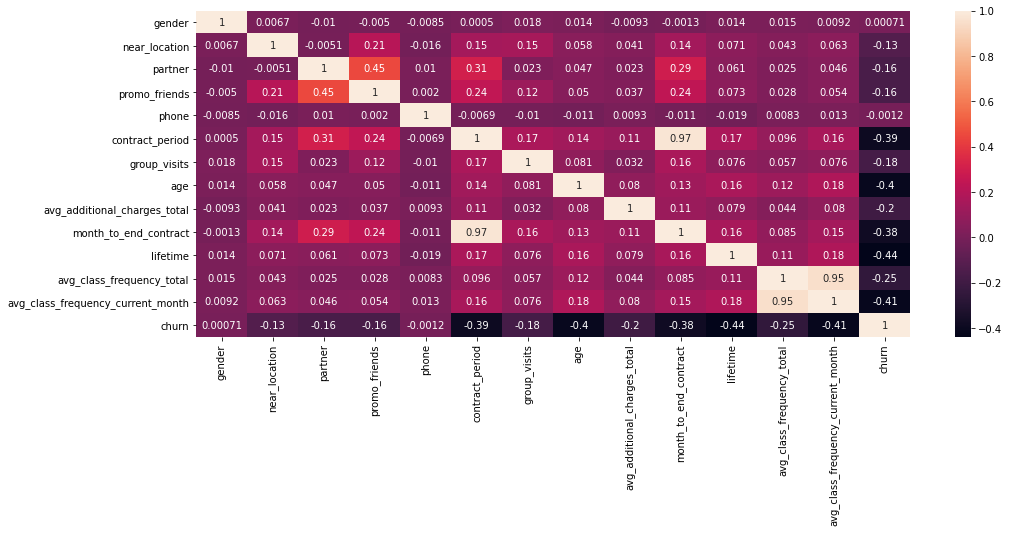

In [10]:
# heatmap:
plt.figure(figsize=(16,6),facecolor='white')
sns.heatmap(corr_matrix,annot=True)
plt.show()


- a strong positive correlation is noted between the contract period of a customer to months left to the end of the cotract. is easily make sense since they are basically completing each other
- also a positive strong correlation with 'Avg_class_frequency_current_month' features and 'Avg_class_frequency_total'. Basically it is here to say that the ones that are consistent with their gym activity will consistent in the most of the time
- positive correlation is noted with 'promo_friend' and 'partner'. this is also has a good sence of logic because many a partner from work will probably come to sign with the gym with a promo discount but not all the promo discount are for a partner from customers work
- there are another correlation that are more soft and the ones that not correlated at all where we also have some negative correlation 'churn' with 'Avg_class_frequency_current_month' & 'lifetime' and that is because when a lifetime on a customer is geting lower there is a chance for him to churn and leave (which is getting higher) 
- Note that we have two pairs of highly correlated features. One feature from a pair of such features should be removed, otherwise, it is gonna dominate other features at the training stage.


[Back to ToC](#content1)

# Step 3. Build a model to predict user churn</p>  <a class="anchor" id="chapter3"></a>
*Build a binary classification model for customers where the target feature is the user's leaving next month*


<b>•	Divide the data into train and validation sets using the train_test_split() function.

In [11]:
# first devive features (x) and target variable (y)
x = gym_df.drop('churn',axis=1)
y = gym_df['churn']

In [12]:
# divide the data into train and test. 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2,random_state=0)
# It is necessary to specify random_state inside train_test_split function.
# Otherwise, clusters will be formed differently every time

We can add stratify=y inside train_test_split function, where y is our target variable. As a result, the dataset will be devided into two clusters. The first one will contain all the observations of class 0, while the second one – all the observations of class 1. Then, 20% of observations from each cluster will be combined into test set

This approach helps to split the data into train and test sets in a way that preserves the proportions of observations in each class as observed in the original dataset. It is important as our classes are imbalanced.

In [13]:
# standardizer:
scaler = StandardScaler() # standardizer
scaler.fit(x_train) # training 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# transform train and test data sets
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

<b>•	Train the model on the train set with two methods:<br>
>o	logistic regression<br> 
o	random forest<br> 


In [15]:
# first define function to print all metrics:
def print_metrics_please(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}\n'.format(recall_score(y_true, y_pred)))
    # print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    # print('\tROC_AUC: {:.2f}\n'.format(roc_auc_score(y_true, y_proba)))

*logistic regression*

In [16]:
# model's algorithm = model_lr (lr = Logistic Regression)
model_lr = LogisticRegression(random_state = 0,solver='lbfgs',max_iter=100) 

In [17]:
# train the model
model_lr.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# use the trained model to make forecasts
predictions_lr = model_lr.predict(x_test) 
probabilities_lr = model_lr.predict_proba(x_test)[:,1]

*random forest*

In [19]:
# algorithem random forest deinced with 100 trees estimators as default
model_rf = RandomForestClassifier(random_state = 0,n_estimators=100) 

In [20]:
# train  random forest model
model_rf.fit(x_train_st, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
# use the trained model to make predictions
predictions_rf = model_rf.predict(x_test_st)
probabilities_rf = model_rf.predict_proba(x_test_st)[:,1]

<b>•	Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [22]:
# print all metrics please
print_metrics_please(y_test,predictions_lr,probabilities_lr,title='Logistic Regression')
print_metrics_please(y_test, predictions_rf, probabilities_rf, title = 'Random Forest:')

Logistic Regression
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.82

Random Forest:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83



the metrics below return values between 0 to 1<p>
At precision we look at the share of correct answers only in the target class<p>
- both models seems to have simmiliar metrics results with a minor differences
- I would probably go with the Logistic Regression model in this case bacause of a higher precision than indicates for a bit better results
- We use precision to understand the following: when our model predicts 'the person is gonna leave', how often is it actually correct? We focus on this mentric, for example, if it is costly for us to prevent a customer from churning. 
By contrast, recall helps to analyse the following: when it is actually 'yes the person is gonna leave', how often does our model predict this correctly? This metric is of a higher priority if we are not ready to miss any churning client. 
The task doesn't give enough information to decide on which metric to use


[Back to ToC](#content1)

# Step 4. Create user clusters  <a class="anchor" id="chapter4"></a>
Set aside the column with data on churn and identify object (user) clusters:


•	Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.<p>
•	Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)


In [23]:
# first import:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [24]:
# scaler = StandardScaler() already defined in line 13 so we use it here:
x_scaler = scaler.fit_transform(x) 

We have to specify random_state for KMeans function. Otherwise different clusters will be formed every time we re-run the code.

In [25]:
# train clustering model with K-means
km = KMeans(n_clusters = 5,random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(x_scaler) # applying the algorithm to the data and forming a cluster vector

In [26]:
# use linkage to build matrix
linked = linkage(x_scaler, method = 'ward') 
# variable linked stores the table with the linked bundles of objects and will be visualized

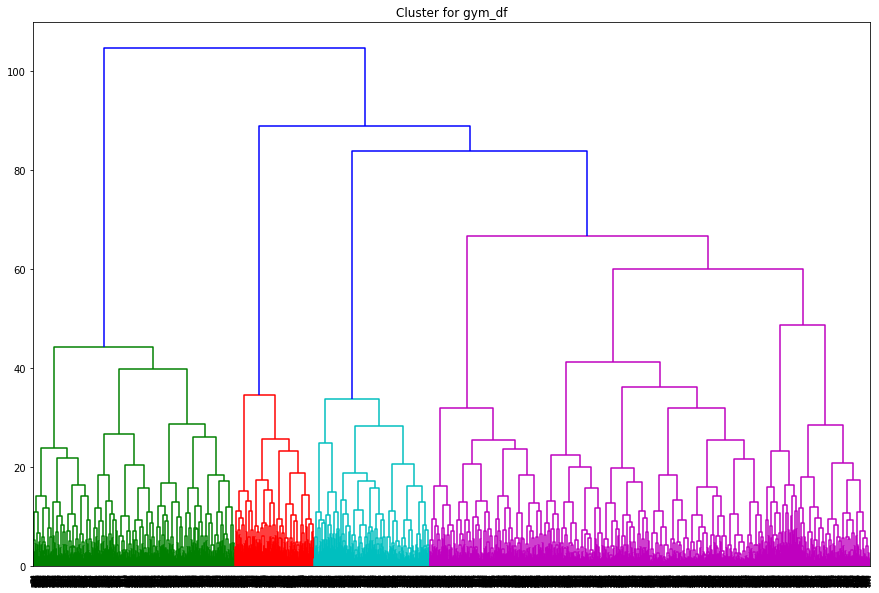

In [27]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Cluster for gym_df')
plt.show()

- clusters show with hierarchical dendogram and conectin between the one index to his related connections while 4 is the ideal number of clusters
- more closer features are the one the related to each other with the color
- the blue color is refered to the number of clusters that we have with the number of vertical line connected to different color

•	Look at the mean feature values for clusters. Does anything catch your eye?<p>
• Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?<p>
•	Plot distributions of features for the clusters. Do you notice anything?



In [28]:
# add cluster as a column to our df
gym_df['cluster'] = labels

In [29]:
# lets have a look into the distribution:
gym_df['cluster'].value_counts()

1    1066
4     936
2     832
3     781
0     385
Name: cluster, dtype: int64

cluster 0 - customers with the longest contract periods and high additional charge in average and a partner also the lowest churn rate - most loyal clients
cluster 1 - has a churn of 26% probability
cluster 2 - group of customers that lives far from the gym location also has about 50% chance to churn
cluster 3 - live near the gym and has about 50% to churn
cluster 4 - very low chance to churn (loyal clients) that lives near the gym location (very like cluster 0) but uses less with promo codes and partners to go to gym. also the group contract period shorter than group 0

In [30]:
cluster_mean = gym_df.groupby('cluster').mean()
cluster_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480300,0.812383,0.000000,0.086304,1.000000,1.863039,0.324578,28.136961,131.299377,1.787992,2.346154,1.325794,1.086387,0.550657
2,0.560096,0.858173,0.337740,0.197115,0.998798,2.734375,0.449519,30.204327,164.628354,2.522837,5.007212,2.926304,2.932554,0.048077
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


In [31]:
# running with plotly through all binary features

# define manually a group of binary features
groupmode = ['gender','near_location','partner','promo_friends','phone','contract_period',
             'group_visits','month_to_end_contract']
 
# subplot
fig = make_subplots(rows=4, cols=2,
                   subplot_titles=groupmode,vertical_spacing=0.07)
 
idx = 0
r = (math.floor(idx/2) + 1)
c = (idx%2 + 1)
legend = True
# itariations 

for i in groupmode:
    fig.add_trace(go.Histogram(x=gym_df.query('cluster == 0')[i],
                               name='cluster_0', legendgroup='cluster_0',
                               marker = {'color':'orchid'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Histogram(x=gym_df.query('cluster == 1')[i],
                               name='cluster_1', legendgroup='cluster_1',
                               marker = {'color':'DodgerBlue'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Histogram(x=gym_df.query('cluster == 2')[i],
                               name='cluster_2', legendgroup='cluster_2',
                               marker = {'color':'orangered'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Histogram(x=gym_df.query('cluster == 3')[i],
                               name='cluster_3', legendgroup='cluster_3',
                               marker = {'color':'PaleGreen'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Histogram(x=gym_df.query('cluster == 4')[i],
                               name='cluster_4', legendgroup='cluster_4',
                               marker = {'color':'darkviolet'},
                               showlegend=legend),
                  row=r, col=c)
    
    idx = idx+1
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    legend = False
 
fig.update_xaxes(type="category", row=3, col=2)
fig.update_layout(barmode='group', height=1200)
fig.show()
 
# not binary features
overlaymode = ['age','avg_additional_charges_total','lifetime','avg_class_frequency_total',
               'avg_class_frequency_current_month']
 
fig = make_subplots(rows=3, cols=2,
                   subplot_titles=overlaymode,vertical_spacing=0.07)
 
idx = 0
r = (math.floor(idx/2) + 1)
c = (idx%2 + 1)
legend = True
 
for i in overlaymode:
    fig.add_trace(go.Box(x=gym_df.query('cluster == 0')[i],
                               name='cluster_0', legendgroup='cluster_0',
                               marker = {'color':'orchid'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Box(x=gym_df.query('cluster == 1')[i],
                               name='cluster_1', legendgroup='cluster_1',
                               marker = {'color':'DodgerBlue'},
                               showlegend=legend),
                  row=r, col=c)
    fig.add_trace(go.Box(x=gym_df.query('cluster == 2')[i],
                               name='cluster_2', legendgroup='cluster_2',
                               marker = {'color':'orangered'},
                               showlegend=legend),
                  row=r, col=c)
    
    fig.add_trace(go.Box(x=gym_df.query('cluster == 3')[i],
                               name='cluster_3', legendgroup='cluster_3',
                               marker = {'color':'PaleGreen'},
                               showlegend=legend),
                  row=r, col=c)
    
    fig.add_trace(go.Box(x=gym_df.query('cluster == 4')[i],
                               name='cluster_4', legendgroup='cluster_4',
                               marker = {'color':'darkviolet'},
                               showlegend=legend),
                  row=r, col=c)
    
    
    
    idx = idx+1
    r = (math.floor(idx/2) + 1)
    c = (idx%2 + 1)
    legend = False
 
fig.update_layout(barmode='overlay', height=900)
fig.update_traces(opacity=0.75)
fig.show()



cluster 0 - customers with the longest contract periods and high additional charge in average and a partner also the lowest churn rate - most loyal clients <p>
cluster 1 - has a churn of 26% probability <p>
cluster 2 - group of customers that lives far from the gym location also has about 50% chance to churn<p>
cluster 3 - live near the gym and has about 50% to churn<p>
cluster 4 - very low chance to churn (loyal clients) that lives near the gym location (very like cluster 0) but uses less with promo codes and partners to go to gym. also the group contract period shorter than group 0

Cluster Conclusions:
- most loyal clients are in clusters 0 + 4 with the lowest chance to churn and leave the gym. these clusters commitment also shown in the additional charges they willing to pay for an extra services which is a good indicator to clients that are eager and willing to go to the gym on daily basis.
- cluster 0 has a long contract period left while in cluster 4 it is the opposite. this may indicate that:
    1. cluster 0 has more new clients
    2. cluster 4 has clients which are already re-newed their contract at least ones
<div><strong>conclusion:</strong> cluster 4 has more loyal customer while cluster 0 has more uncertenty in it regarding the type of the clients since we can hardly tell if these clients are going to renew their contract period at the end or not while is is more easier to say that cluster 4 customer will probably renew at end of their period</div>
- remaining cluster are the ones that has more chances for the clients to churn than the other two with different chances in them
- from macro point of view: 2 cluster with very low churn rate. cluster_! with medium churn rate and two remaing with the highest churn rate in them



[Back to ToC](#content1)

# Step 5. Conclusions and basic recommendations on working with customers  <a class="anchor" id="chapter5"></a>


- user originally signed up through a "bring a friend" offer (promo_friend feature) can be highly rated within the methods that may improve clients engagement (churn false = stay) as was noted in the cluster number 2 <p>
additional work can be done to other cluster with initiative to bring their friend as maybe friend going together to a gym has a good psychological impact where both are willing to go and avoid lazines and improve churn being a zero. same might be applied with 'partner' feature as well
- A gym should be represented to all client with no segregation and age differences. cluser_2 is more younger cluseter compared to other. if adjustments made it can improve others age to be more engaged to the gym by maybe have a yoga class or more morning activities and classes so the olderers can have the filling of being wanted as a client no less than younger ages
- more flexible contract periods can have a good impact on clients and maybe adjusting tariffs and provide more than one type of subscription can call a new audience of clients that may feel being more flexible with no penalties when the subscriber wants to terminate the contract before end of if. that way, by letting the client feel "more free to choose" at any time can lead increase for new subscribers

[Back to ToC](#content1)